### Implementation of ANN using Keras:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
# version check:

print(f"Tensorflow version:{tf.__version__}")
print(f"Keras version:{tf.keras.__version__}")

Tensorflow version:2.10.0
Keras version:2.10.0


In [3]:
os.getcwd()

'C:\\Users\\Yash'

In [6]:
# GPU/CPU check:

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list=['GPU','CPU']

for device in check_list:
    out=tf.config.list_physical_devices(device)
    if len(out)>0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Creating a simple classifier using keras on MNIST data

In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Yash\\.conda\\envs\\tensor2\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [10]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [12]:
x_train_full.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
print(f"data type of x_train_full: {x_train_full.dtype}")

data type of x_train_full: uint8


In [15]:
# validation data:

x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [16]:
x_test=x_test/255.

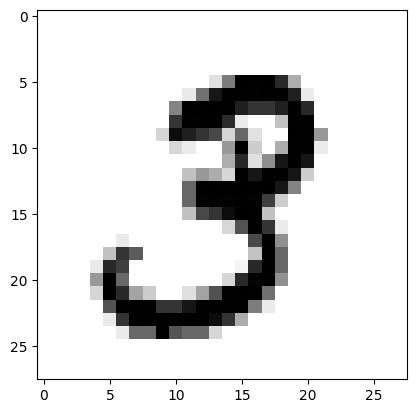

In [21]:
plt.imshow(x_train[1],cmap='binary')
plt.show()

<AxesSubplot: >

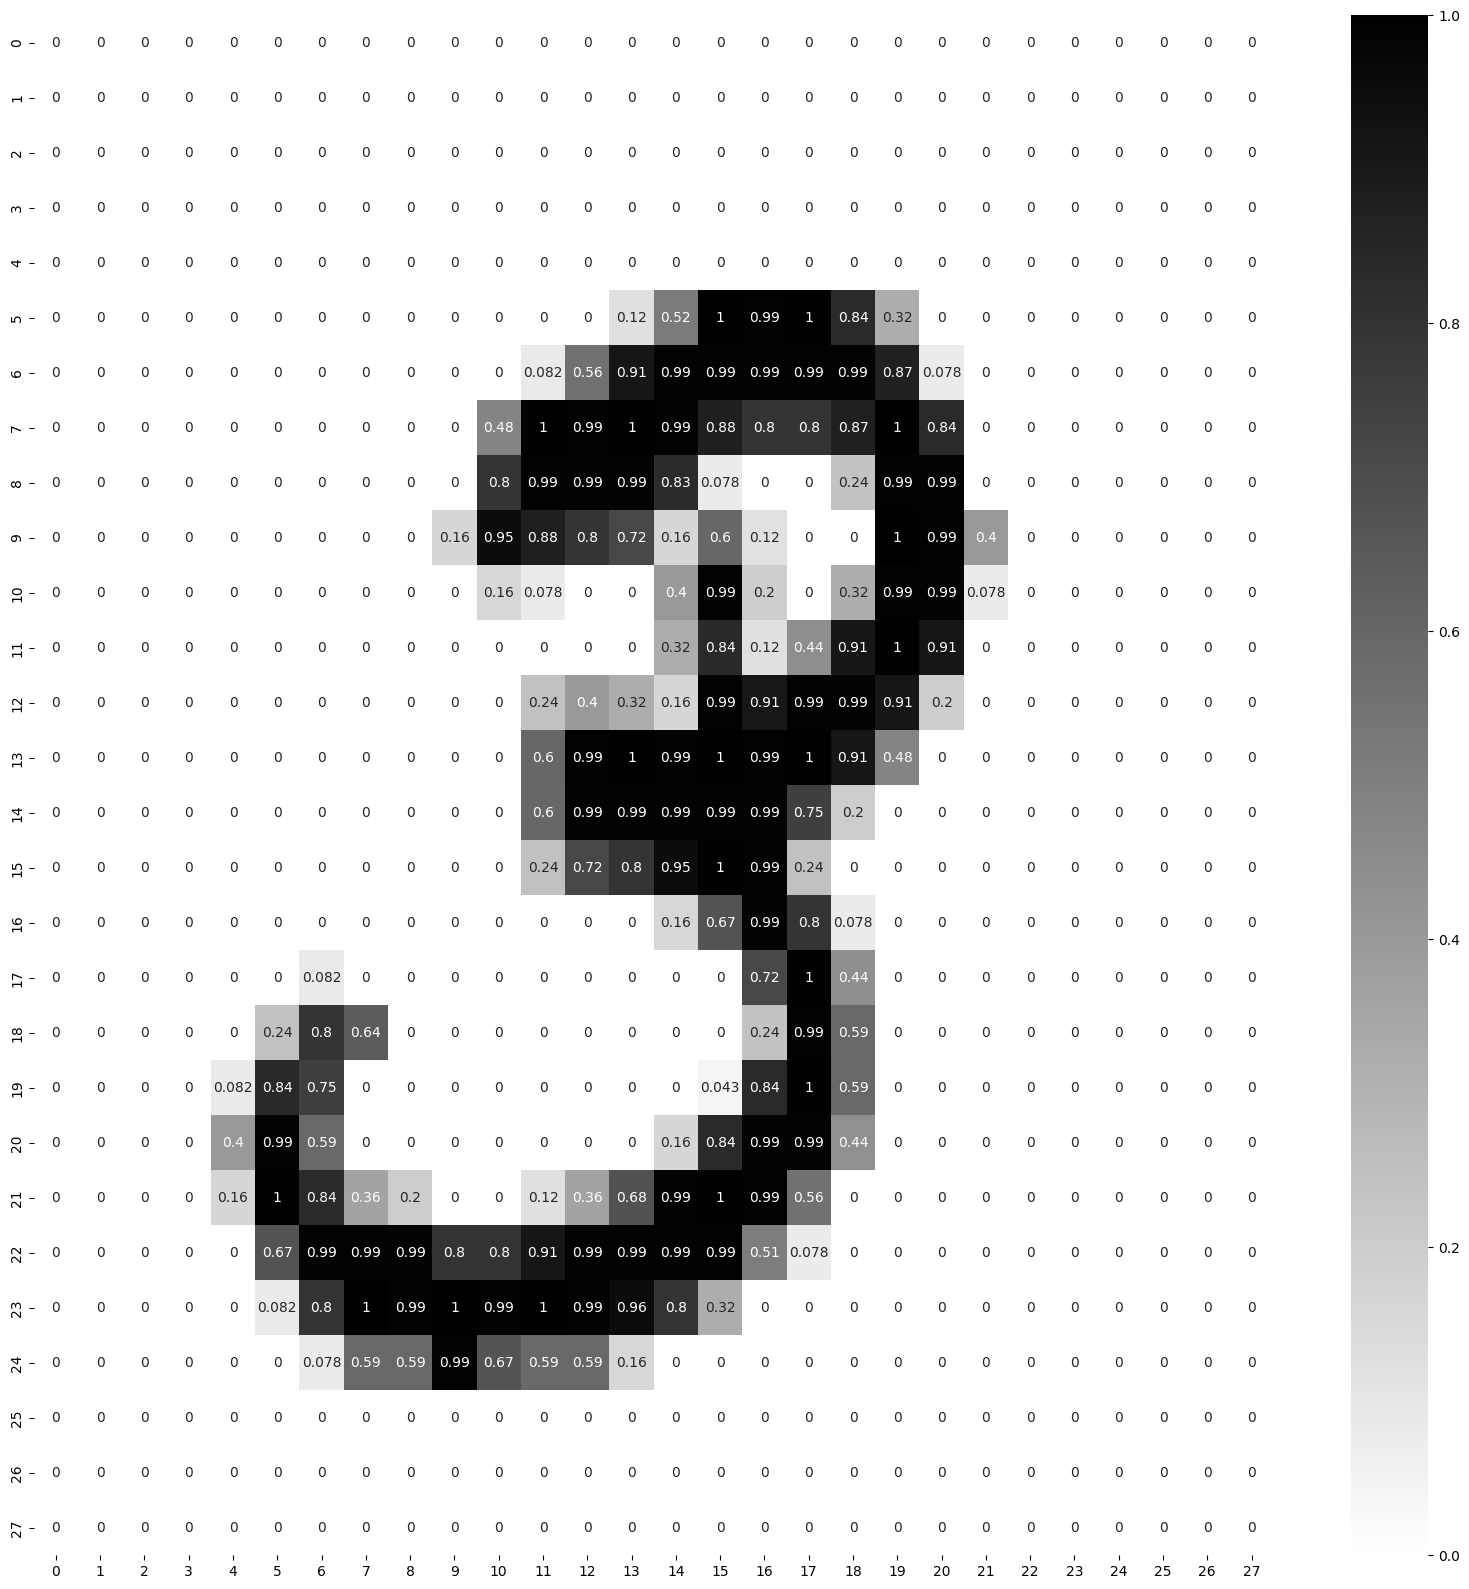

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train[1],annot=True,cmap='binary')

In [31]:
# creating layers:

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='input_layer'),
        tf.keras.layers.Dense(300,activation='relu',name='hidden_layer_1'),
        tf.keras.layers.Dense(100,activation='relu',name='hidden_layer_2'),
        tf.keras.layers.Dense(10,activation='softmax',name='output_layer')
]
model_clf=tf.keras.models.Sequential(LAYERS)

In [34]:
model_clf.layers

In [35]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
28*28#(shape)

784

### (previous layers)* (new layers) + (bias in new layers)

In [37]:
 784*300 +300 # = param1 

235500

In [38]:
300*100+100

30100

In [39]:
hidden1=model_clf.layers[1]
hidden1.name

'hidden_layer_1'

In [41]:
len(hidden1.get_weights())

2

In [44]:
hidden1.get_weights()[0]

array([[ 0.02375308,  0.03341849, -0.00561549, ..., -0.05592611,
        -0.03587252,  0.07312043],
       [-0.06770273,  0.05646603, -0.04069459, ..., -0.02672949,
        -0.03634756, -0.00652269],
       [-0.01458506, -0.0198582 ,  0.01390011, ..., -0.00868752,
         0.07303138, -0.06726053],
       ...,
       [-0.00693832,  0.04347539,  0.03995632, ..., -0.04394937,
         0.06805159,  0.02913789],
       [ 0.01622719, -0.00282777,  0.01936351, ...,  0.00048847,
         0.03341845,  0.02907766],
       [-0.06778038, -0.03318391, -0.03730012, ...,  0.04436704,
        -0.06806394,  0.00495711]], dtype=float32)

In [45]:
hidden1.get_weights()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
weights,biases=hidden1.get_weights()

In [47]:
weights.shape

(784, 300)

In [48]:
biases.shape

(300,)

In [49]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']

In [50]:
model_clf.compile(loss=LOSS_FUNCTION,
                 metrics=METRICS,
                 optimizer=OPTIMIZER)

In [51]:
EPOCH=50
VALIDATION_SET=(x_valid,y_valid)
history=model_clf.fit(x_train,y_train,epochs=EPOCH,
                     validation_data=VALIDATION_SET,
                     batch_size=32)

Epoch 1/50
1719/1719 [==============================] - 16s 5ms/step - loss: 0.6205 - accuracy: 0.8369 - val_loss: 0.3039 - val_accuracy: 0.9178
Epoch 2/50
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2882 - accuracy: 0.9176 - val_loss: 0.2367 - val_accuracy: 0.9334
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2356 - accuracy: 0.9339 - val_loss: 0.2031 - val_accuracy: 0.9458
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2013 - accuracy: 0.9431 - val_loss: 0.1817 - val_accuracy: 0.9502
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1764 - accuracy: 0.9501 - val_loss: 0.1591 - val_accuracy: 0.9570
Epoch 6/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1568 - accuracy: 0.9551 - val_loss: 0.1438 - val_accuracy: 0.9608
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1404 - accuracy: 0.9600 - val_loss: 0.1322 - val_ac

In [52]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [53]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.620499,0.836927,0.303916,0.9178
1,0.288151,0.917600,0.236658,0.9334
2,0.235576,0.933891,0.203050,0.9458
3,0.201315,0.943127,0.181732,0.9502
4,0.176366,0.950055,0.159070,0.9570
5,0.156795,0.955073,0.143795,0.9608
6,0.140379,0.960018,0.132205,0.9646
7,0.127035,0.963782,0.125500,0.9674
8,0.115698,0.967055,0.115640,0.9668
9,0.105940,0.969964,0.108845,0.9708


<AxesSubplot: >

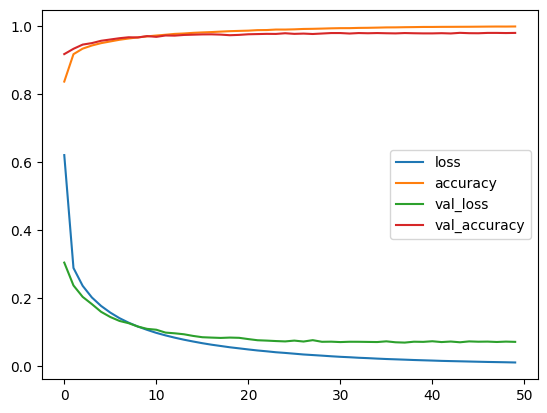

In [54]:
pd.DataFrame(history.history).plot()

In [55]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0679 - accuracy: 0.9807


[0.06786394119262695, 0.9807000160217285]

In [56]:
# sample_check

x_new=x_test[:3]

In [57]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [58]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 235ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [59]:
y_prob

array([[1.1022302e-07, 1.4508445e-08, 4.3631094e-06, 5.8169742e-05,
        5.4375962e-09, 1.6356986e-09, 2.7750746e-14, 9.9993658e-01,
        2.0235875e-07, 5.3016402e-07],
       [1.0481889e-08, 5.7045105e-07, 9.9999833e-01, 8.6029723e-07,
        3.7495258e-14, 3.8730392e-09, 2.2889954e-09, 4.7181446e-17,
        2.7852755e-07, 2.1265768e-14],
       [4.9347034e-07, 9.9879897e-01, 9.8227814e-05, 4.2114129e-06,
        9.6709176e-05, 1.5389327e-06, 4.7237903e-05, 4.6200270e-04,
        4.8896222e-04, 1.6965837e-06]], dtype=float32)

In [60]:
y_pred=np.argmax(y_prob,axis=-1)

In [61]:
y_pred

array([7, 2, 1], dtype=int64)

In [62]:
actual

array([7, 2, 1], dtype=uint8)

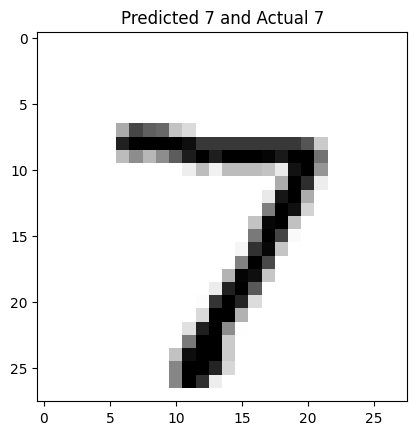

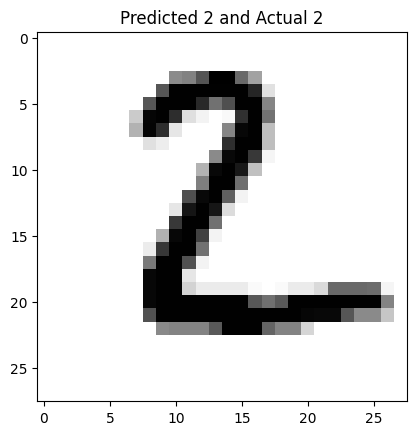

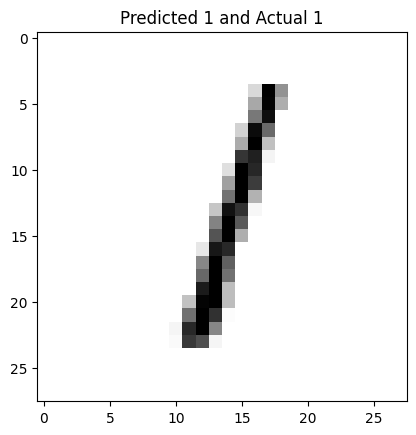

In [68]:
for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.show()
    